           X          Y              NAME                                 ADDRESS          LINE
0 -76.911466  38.826454        Branch Ave       4704 OLD SOPER ROAD, SUITLAND, MD         green
1 -77.053670  38.814151     Braddock Road         700 N. WEST ST., ALEXANDRIA, VA  blue, yellow
2 -77.060813  38.806594  King St-Old Town        1900 KING STREET, ALEXANDRIA, VA  blue, yellow
3 -77.070877  38.800433    Eisenhower Ave  2400 EISENHOWER AVENUE, ALEXANDRIA, VA        yellow
4 -77.075208  38.793924        Huntington  2701 HUNTINGTON AVENUE, ALEXANDRIA, VA        yellow
(98, 5)
X          0
Y          0
NAME       0
ADDRESS    0
LINE       0
dtype: int64
0
X          float64
Y          float64
NAME        object
ADDRESS     object
LINE        object
dtype: object
X          97
Y          98
NAME       98
ADDRESS    98
LINE       14
dtype: int64
           X          Y              NAME                            ADDRESS     LINE
0 -76.911466  38.826454        Branch Ave  4704 OLD SOPER 

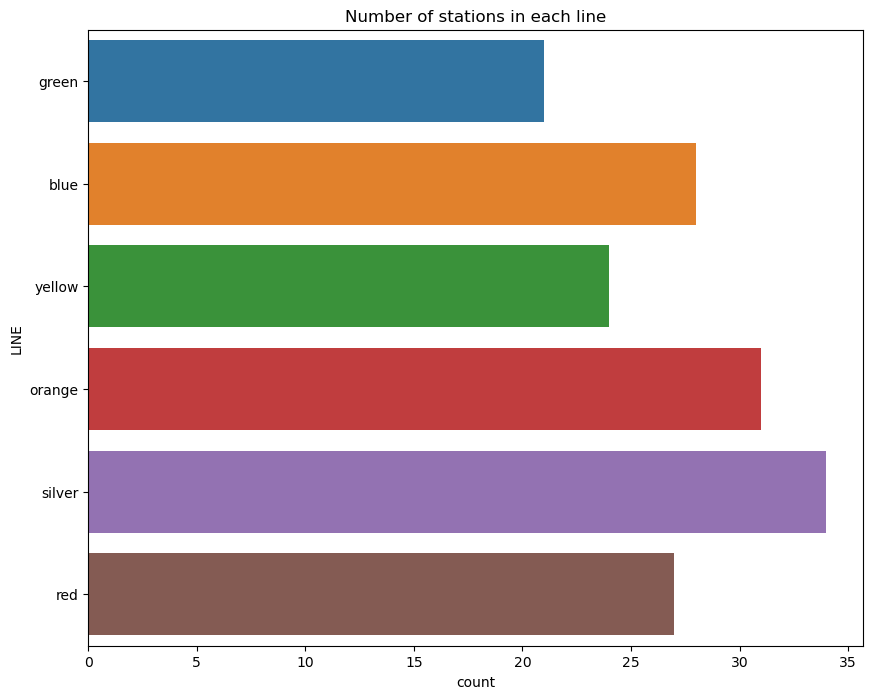

           X          Y              NAME                            ADDRESS    LINE             LOCATION         CITY STATE
0 -76.911466  38.826454        Branch Ave  4704 OLD SOPER ROAD, SUITLAND, MD   green  4704 OLD SOPER ROAD     SUITLAND    MD
1 -77.053670  38.814151     Braddock Road    700 N. WEST ST., ALEXANDRIA, VA    blue      700 N. WEST ST.   ALEXANDRIA    VA
1 -77.053670  38.814151     Braddock Road    700 N. WEST ST., ALEXANDRIA, VA  yellow      700 N. WEST ST.   ALEXANDRIA    VA
2 -77.060813  38.806594  King St-Old Town   1900 KING STREET, ALEXANDRIA, VA    blue     1900 KING STREET   ALEXANDRIA    VA
2 -77.060813  38.806594  King St-Old Town   1900 KING STREET, ALEXANDRIA, VA  yellow     1900 KING STREET   ALEXANDRIA    VA


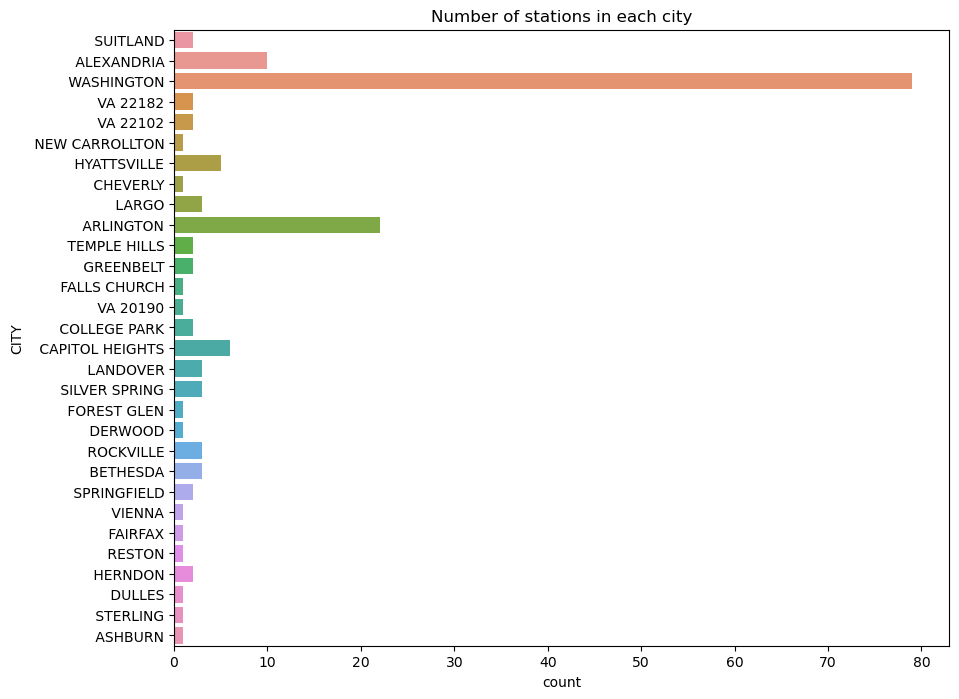

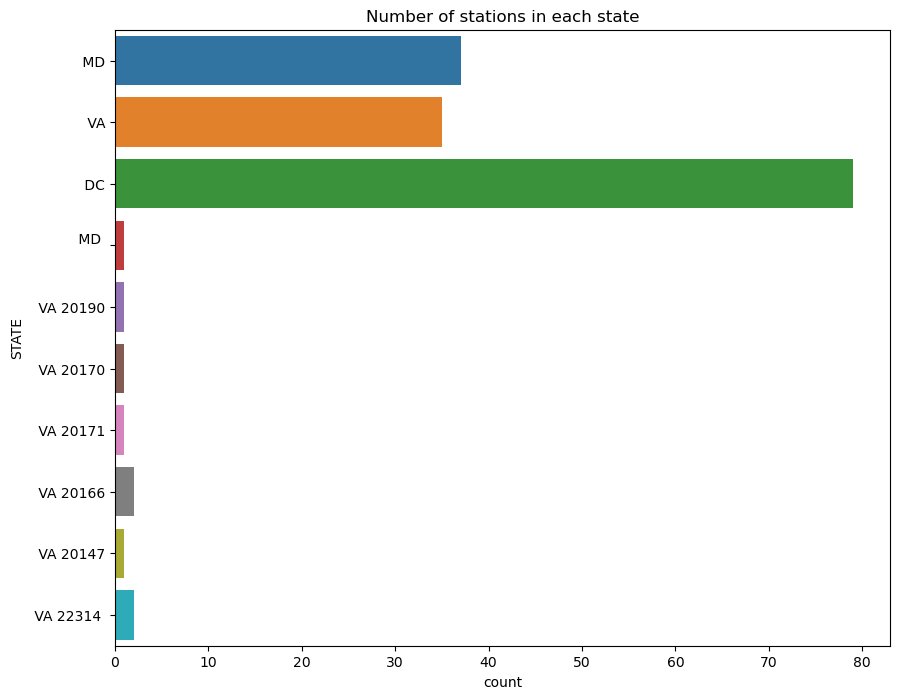

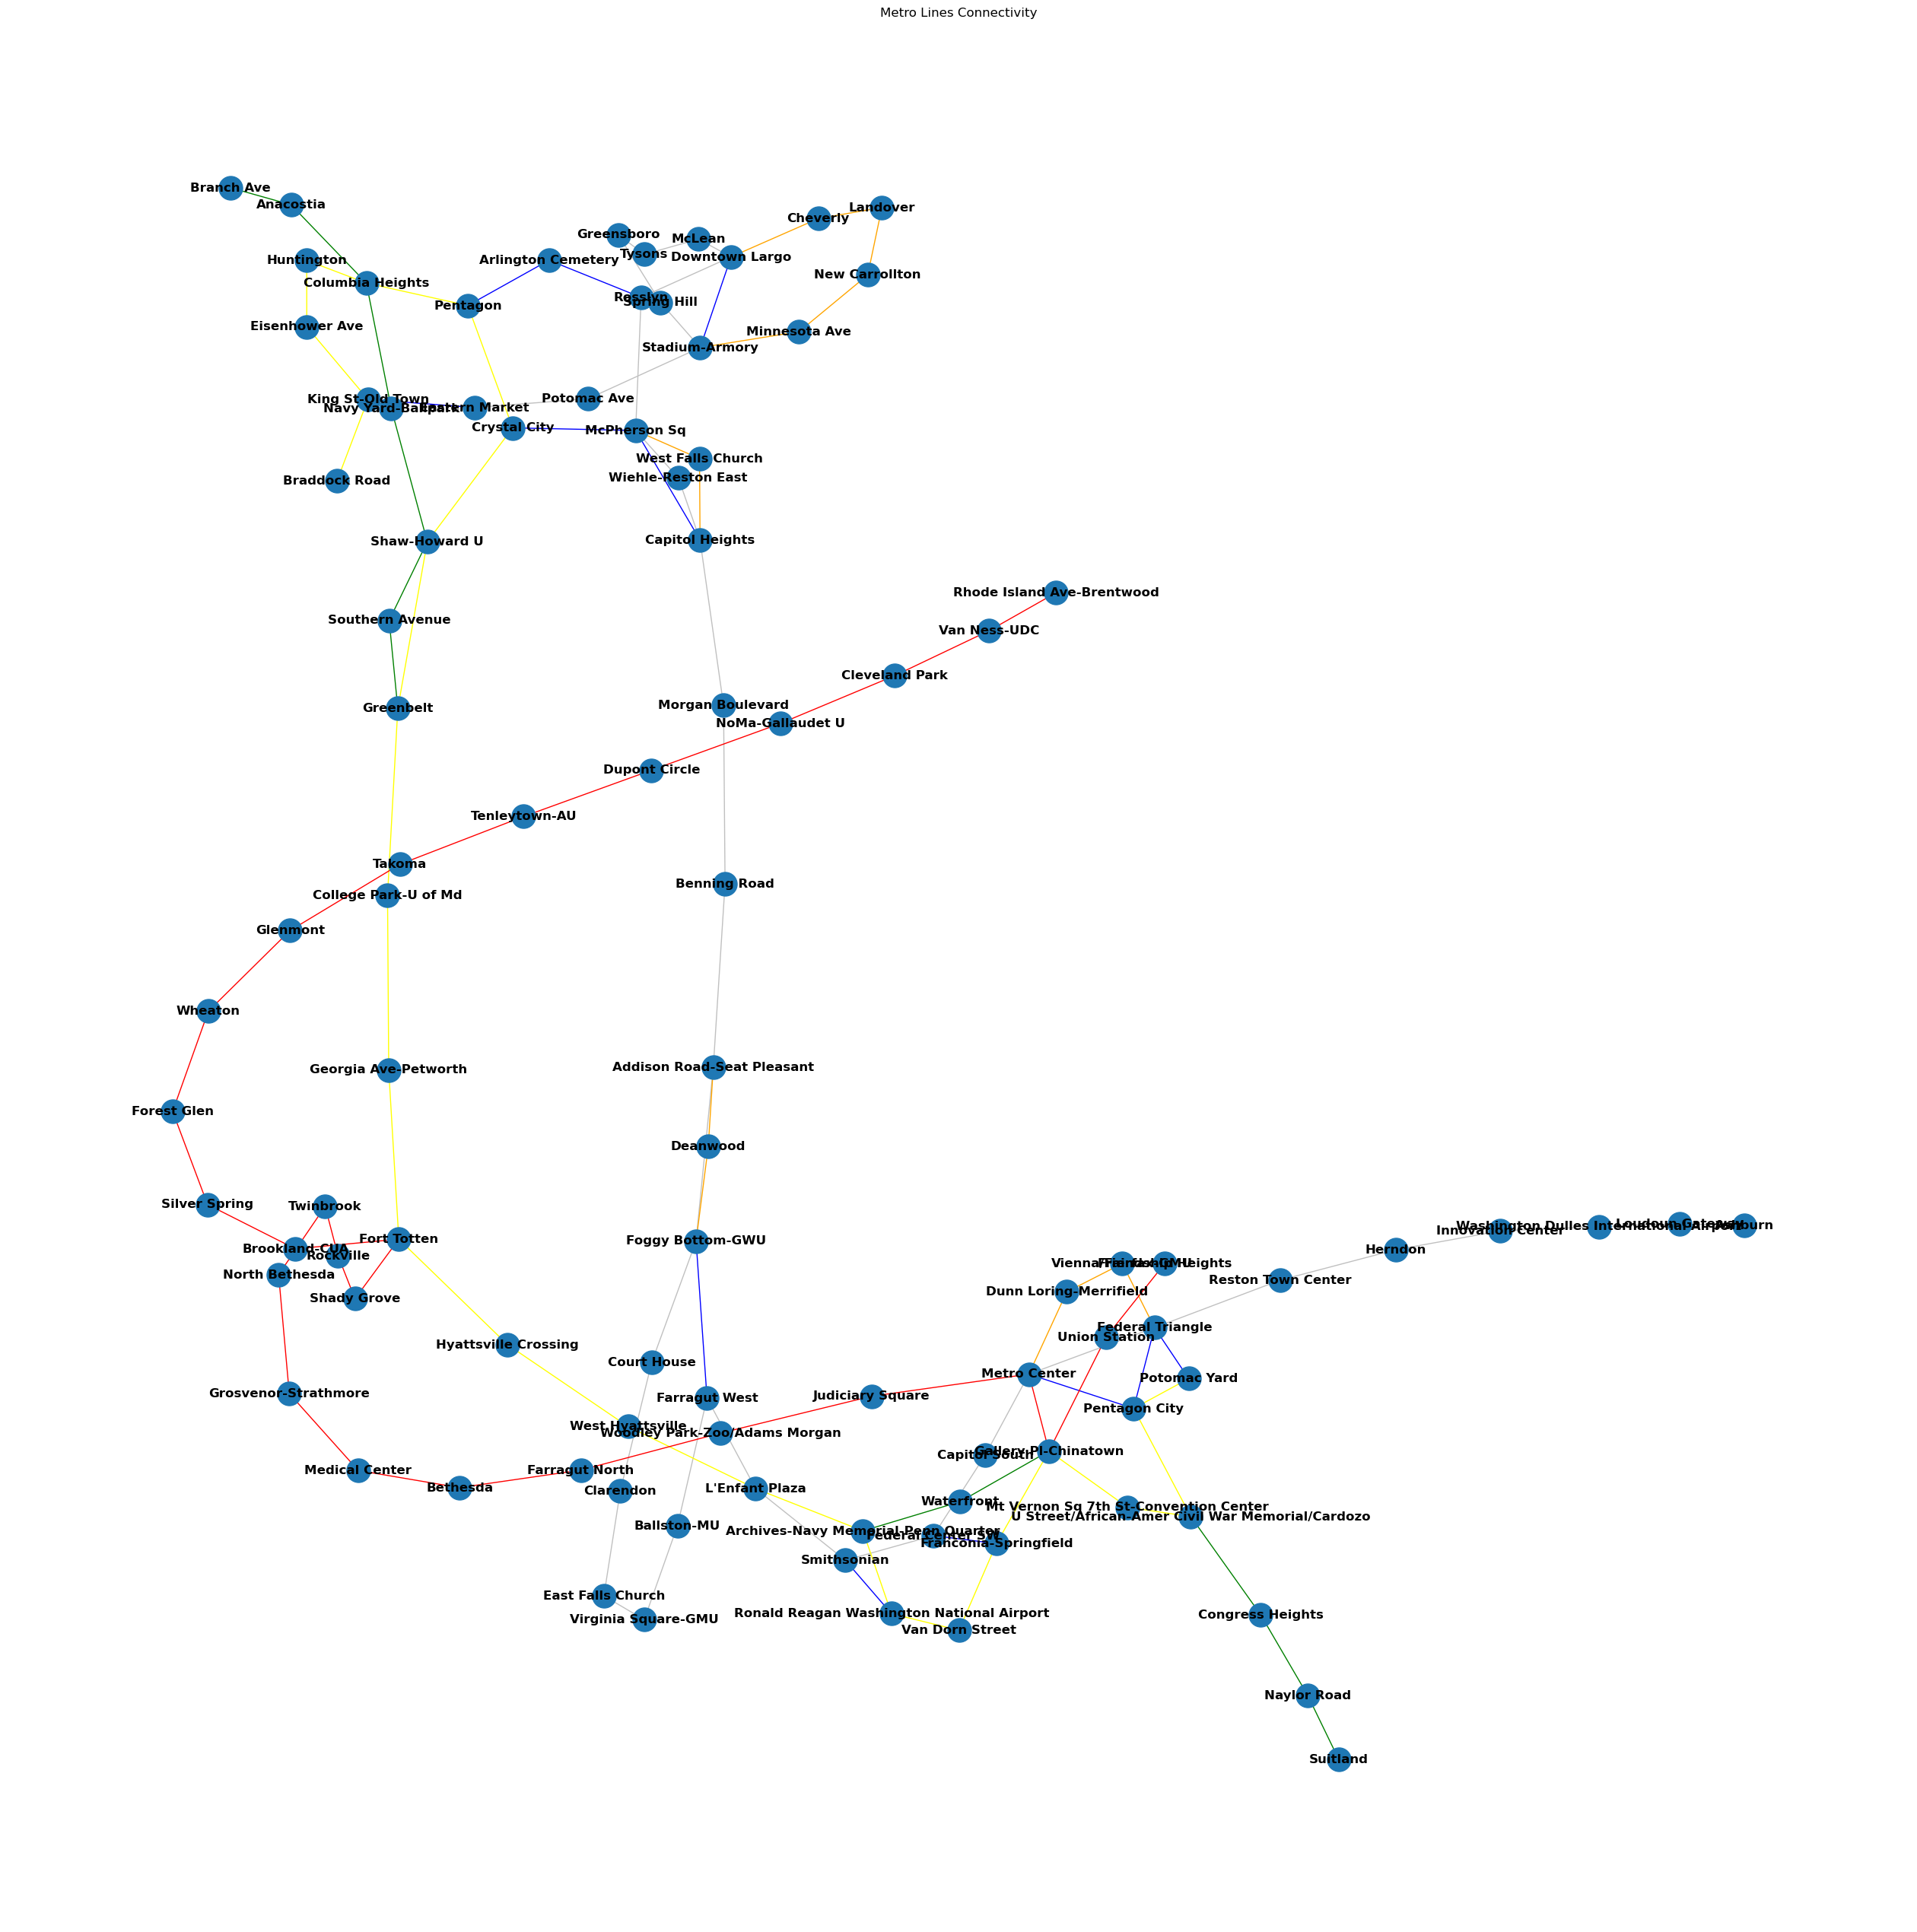

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Read in the data
df = pd.read_csv(r"C:\Users\srika\Downloads\Metro_Stations_Regional_Updated.csv")
print(df.head().to_string())
print(df.shape)

# The dataset columns and values

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check for data types
print(df.dtypes)

# Check for unique values
print(df.nunique())

df_new = df.assign(LINE=df.LINE.str.split(',')).explode('LINE')
print(df_new.head().to_string())

df_new['LINE'] = df_new['LINE'].str.strip()
df_new['LINE'] = df_new['LINE'].replace(['grn', 'yllw', 'slvr'], ['green', 'yellow', 'silver'])
print(df_new.head().to_string())

# plot the number of stations in each line
plt.figure(figsize=(10, 8))
sns.countplot(y='LINE', data=df_new)
plt.title('Number of stations in each line')
plt.show()

# number of station per by city and have address column only
# split the address column into city and state
df_new[['LOCATION', 'CITY', 'STATE']] = df_new['ADDRESS'].str.split(',', expand=True)
print(df_new.head().to_string())

# plot the histogram with kde for the number of stations in each city
plt.figure(figsize=(10, 8))
sns.countplot(y='CITY', data=df_new)
plt.title('Number of stations in each city')
plt.show()

# plot the number of stations in each state
plt.figure(figsize=(10, 8))
sns.countplot(y='STATE', data=df_new)
plt.title('Number of stations in each state')
plt.show()

# Creating a graph based on connections between stations within the same line
G = nx.Graph()
line_colors = {'green': 'green', 'blue': 'blue', 'yellow': 'yellow', 'red': 'red', 'orange': 'orange',
               'silver': 'silver'}

for line, sub_df in df_new.groupby('LINE'):
    connections = list(zip(sub_df['NAME'][:-1], sub_df['NAME'][1:]))
    G.add_edges_from(connections, color=line_colors[line])

# Plotting the network graph with different colors for each line
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G)
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, font_weight='bold', edge_color=edge_colors)
plt.title('Metro Lines Connectivity')
plt.show()



C:\Users\srika\AppData\Local\Temp\ipykernel_22124\3526179121.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


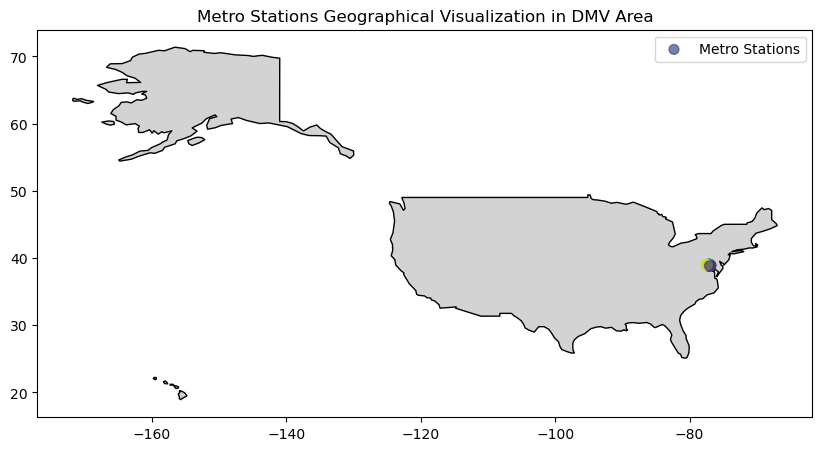

In [9]:
# Convert dataframe to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set up the base map focused on Washington D.C., Maryland, and Virginia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
extent = (-78, 38.5, -76.5, 39.5)  # Set longitude and latitude bounds
base = world.cx[extent[0]:extent[2], extent[1]:extent[3]].plot(figsize=(10, 8), color='lightgrey', edgecolor='black')

# Plotting stations on the map
gdf.plot(ax=base, markersize=50, column='LINE', legend=True, cmap='viridis', label='Metro Stations', alpha=0.7)
plt.title('Metro Stations Geographical Visualization in DMV Area')
plt.legend()
plt.show()

In [10]:
import folium

In [14]:
map_center = [38.9, -77.1]  # Adjust these coordinates to center the map as needed
dmv_map = folium.Map(location=map_center, zoom_start=11)

# Add markers for each metro station
for index, station in df.iterrows():
    folium.Marker([station['Y'], station['X']], popup=station['NAME']).add_to(dmv_map)
dmv_map.save('dmv_map.html')

In [13]:
dmv_map

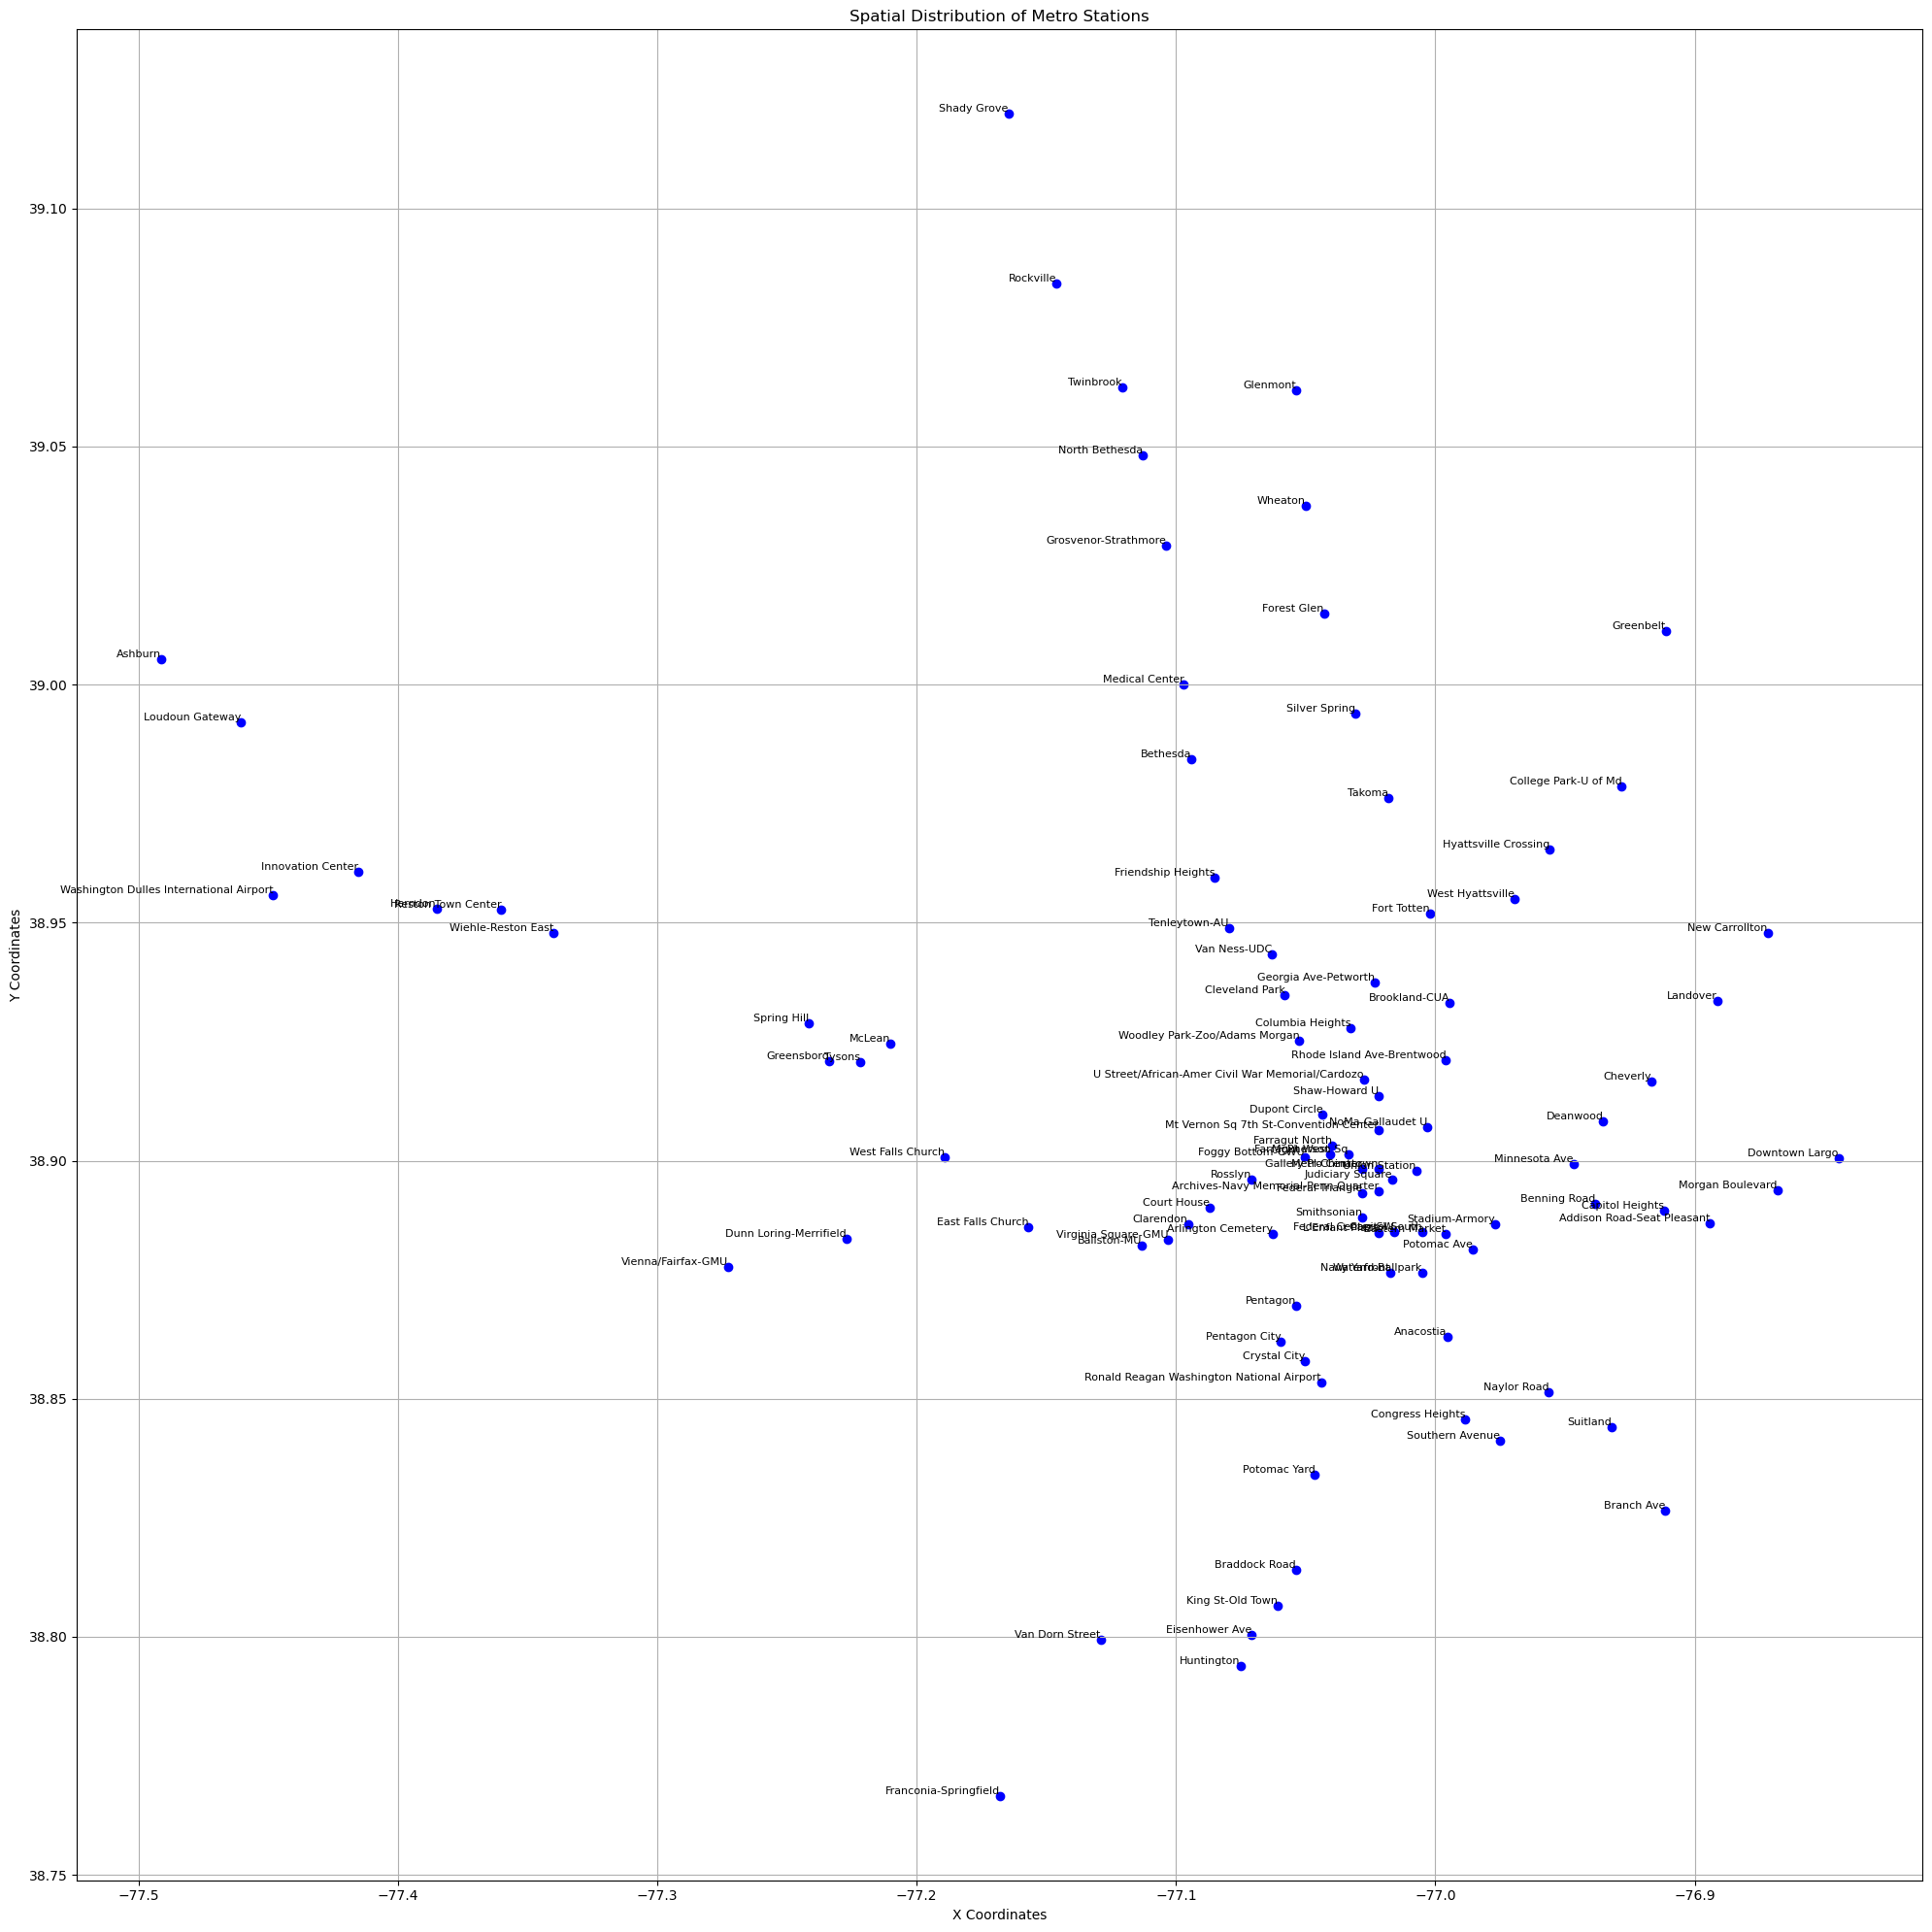

In [20]:
X = df['X']
Y = df['Y']
station_names = df['NAME']

# Plotting X vs Y to visualize the spatial distribution of metro stations
plt.figure(figsize=(20, 20))
plt.scatter(X, Y, marker='o', color='blue')

#Adding station names as annotations
for i, station in enumerate(station_names):
    plt.text(X[i], Y[i], station, fontsize=8, ha='right', va='bottom')

plt.title('Spatial Distribution of Metro Stations')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
line_counts = {line: df_new['LINE'].count(line) for line in set(df_new['LINE'])}

# Prepare data for pie chart
line_labels = list(line_counts.keys())
line_values = list(line_counts.values())

# Plotting the pie chart for line distribution
plt.figure(figsize=(8, 6))
plt.pie(line_values, labels=line_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'blue', 'yellow'])
plt.title('Proportion of Stations on Different Metro Lines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

TypeError: Series.count() takes 1 positional argument but 2 were given

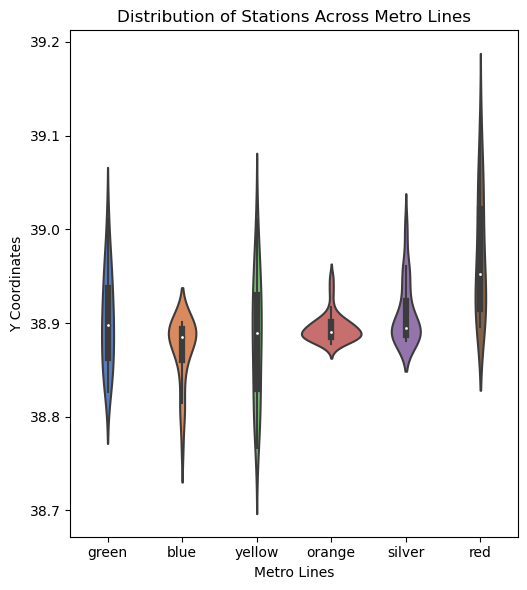

In [26]:
plt.figure(figsize=(10, 6))

# Violin plot for distribution comparison across metro lines
plt.subplot(1, 2, 1)
sns.violinplot(x='LINE', y='Y', data=df_new, palette='muted')
plt.title('Distribution of Stations Across Metro Lines')
plt.xlabel('Metro Lines')
plt.ylabel('Y Coordinates')

plt.tight_layout()
plt.show()

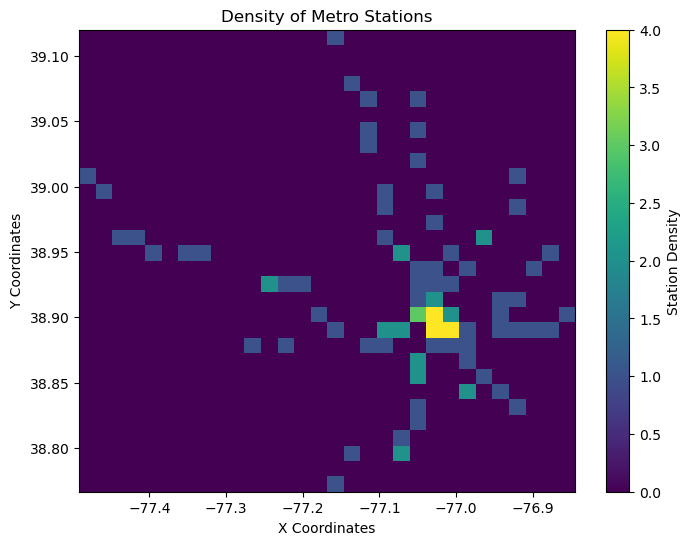

In [28]:
X = df['X']
Y = df['Y']

# Create a 2D histogram (heatmap) of station density
plt.figure(figsize=(8, 6))
plt.hist2d(X, Y, bins=30, cmap='viridis')

plt.colorbar(label='Station Density')
plt.title('Density of Metro Stations')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()